In [1]:
import large_image

In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['image.cmap'] = 'gray'

#### Download SVS file (WholeSlideImage file)

In [3]:
wsi_url = 'https://data.kitware.com/api/v1/file/5899dd6d8d777f07219fcb23/download'

wsi_path = 'TCGA-02-0010-01Z-00-DX4.07de2e55-a8fe-40ee-9e98-bcb78050b9f7.svs'

if not os.path.isfile(wsi_path):
    !curl -OJ "$wsi_url"

### Loading WholeslideImage (WSI) - Complete huge image of size 643 MB using largeImage utilitty

In [4]:
ts = large_image.getTileSource(wsi_path)

### Getting Tile Pyramidal meta data of downloaded WSI file

In [5]:
ts.getMetadata()

{'levels': 9,
 'sizeX': 32001,
 'sizeY': 38474,
 'tileWidth': 240,
 'tileHeight': 240,
 'magnification': 20.0,
 'mm_x': 0.0005015,
 'mm_y': 0.0005015}

### Get the magnification associated with all levels of the image pyramid

levels - number of levels in the image pyramid

magnification - native magnification or the magnification associated with the base or highest resolution level at which the slide was scanned.

mm_x, mm_y - width and height of a pixel in millimeters at the base resolution.

In [6]:
for i in range(ts.levels):
    print('Level-{} : {}'.format(
        i, ts.getMagnificationForLevel(level=i)))

Level-0 : {'magnification': 0.078125, 'mm_x': 0.128384, 'mm_y': 0.128384, 'scale': 256.0, 'level': 0}
Level-1 : {'magnification': 0.15625, 'mm_x': 0.064192, 'mm_y': 0.064192, 'scale': 128.0, 'level': 1}
Level-2 : {'magnification': 0.3125, 'mm_x': 0.032096, 'mm_y': 0.032096, 'scale': 64.0, 'level': 2}
Level-3 : {'magnification': 0.625, 'mm_x': 0.016048, 'mm_y': 0.016048, 'scale': 32.0, 'level': 3}
Level-4 : {'magnification': 1.25, 'mm_x': 0.008024, 'mm_y': 0.008024, 'scale': 16.0, 'level': 4}
Level-5 : {'magnification': 2.5, 'mm_x': 0.004012, 'mm_y': 0.004012, 'scale': 8.0, 'level': 5}
Level-6 : {'magnification': 5.0, 'mm_x': 0.002006, 'mm_y': 0.002006, 'scale': 4.0, 'level': 6}
Level-7 : {'magnification': 10.0, 'mm_x': 0.001003, 'mm_y': 0.001003, 'scale': 2.0, 'level': 7}
Level-8 : {'magnification': 20.0, 'mm_x': 0.0005015, 'mm_y': 0.0005015, 'level': 8, 'scale': 1.0}


### The tileIterator() function 

Provides a iterator for sequentially iterating through the entire slide 

or a region of interest (ROI) within the slide at any desired resolution in a tile-wise fashion.

In [7]:
num_tiles = 0

tile_means = []
tile_areas = []

for tile_info in ts.tileIterator(
    region=dict(left=5000, top=5000, width=20000, height=20000, units='base_pixels'),
    scale=dict(magnification=20),
    tile_size=dict(width=1000, height=1000),
    tile_overlap=dict(x=50, y=50),
    format=large_image.tilesource.TILE_FORMAT_PIL
):

    if num_tiles == 100:
        print('Tile-{} = '.format(num_tiles))
        display(tile_info)

    im_tile = np.array(tile_info['tile'])
    tile_mean_rgb = np.mean(im_tile[:, :, :3], axis=(0, 1))

    tile_means.append( tile_mean_rgb )
    tile_areas.append( tile_info['width'] * tile_info['height'] )

    num_tiles += 1

slide_mean_rgb = np.average(tile_means, axis=0, weights=tile_areas)

print('Number of tiles = {}'.format(num_tiles))
print('Slide mean color = {}'.format(slide_mean_rgb))

Tile-100 = 


{'x': 16150,
 'y': 8550,
 'width': 1000,
 'height': 1000,
 'level': 8,
 'level_x': 17,
 'level_y': 9,
 'magnification': 20.0,
 'mm_x': 0.0005015,
 'mm_y': 0.0005015,
 'tile_position': {'level_x': 17,
  'level_y': 9,
  'region_x': 12,
  'region_y': 4,
  'position': 100},
 'iterator_range': {'level_x_min': 5,
  'level_y_min': 5,
  'level_x_max': 27,
  'level_y_max': 27,
  'region_x_max': 22,
  'region_y_max': 22,
  'position': 484},
 'tile_overlap': {'left': 25, 'top': 25, 'right': 25, 'bottom': 25},
 'tile': <PIL.Image.Image image mode=RGBA size=1000x1000 at 0x7F011A43FF98>,
 'format': 'PIL',
 'gx': 16150.0,
 'gy': 8550.0,
 'gwidth': 1000.0,
 'gheight': 1000.0}

Number of tiles = 484
Slide mean color = [214.70349159 142.16679253 172.30744139]


### getSingleTile() function

Can be used to directly get the tile at a specific position of the tile iterator

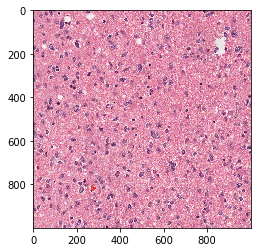

In [8]:
pos = 1000

tile_info = ts.getSingleTile(
    tile_size=dict(width=1000, height=1000),
    scale=dict(magnification=20),
    tile_position=pos
)

plt.imshow(tile_info['tile'])

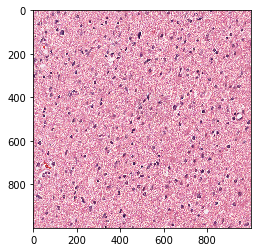

In [11]:
pos = 500

tile_info = ts.getSingleTile(
    tile_size=dict(width=1000, height=1000),
    scale=dict(magnification=20),
    tile_position=pos
)

plt.imshow(tile_info['tile'])

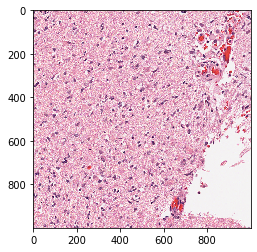

In [13]:
pos = 300
tile_info = ts.getSingleTile(
    tile_size=dict(width=1000, height=1000),
    scale=dict(magnification=20),
    tile_position=pos
)

plt.imshow(tile_info['tile'])

### getRegion() function

Can be used to get a rectangular region of interest (ROI) within the slide at any scale/magnification via the following two parameters:

region - a dictionary containing the (left, top, width, height, units) of the ROI

scale - a dictionary containing the magnification or the physical size of a pixel (mm_x, mm_y)

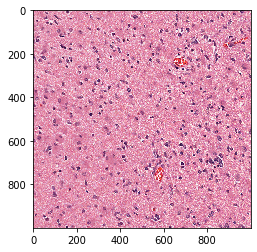

In [14]:
im_roi, _ = ts.getRegion(
    region=dict(left=10000, top=10000, width=1000, height=1000, units='base_pixels'),
    format=large_image.tilesource.TILE_FORMAT_NUMPY
)

plt.imshow(im_roi)

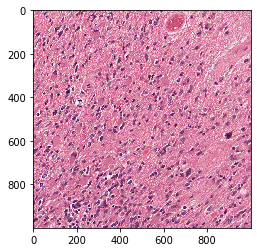

In [15]:
im_roi, _ = ts.getRegion(
    region=dict(left=15000, top=10000, width=1000, height=1000, units='base_pixels'),
    format=large_image.tilesource.TILE_FORMAT_NUMPY
)

plt.imshow(im_roi)

### Entire slide at low magnification

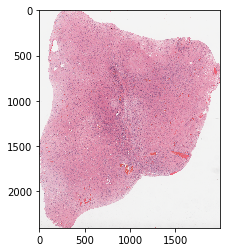

In [16]:
im_low_res, _ = ts.getRegion(
    scale=dict(magnification=1.25),
    format=large_image.tilesource.TILE_FORMAT_NUMPY
)

plt.imshow(im_low_res)